In [4]:
# Importar las bibliotecas necesarias
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Leer el archivo `.dat` (asumiendo que es similar a un CSV con separadores por comas)
file_path = "automobile.dat"

# Leer el archivo como DataFrame, adaptando el separador si es necesario
with open(file_path, 'r') as file:
    lines = file.readlines()

# Buscar la sección @data e identificar las columnas
data_start_idx = None
for idx, line in enumerate(lines):
    if line.strip().lower() == "@data":
        data_start_idx = idx
        break

# Definir nombres de columnas con base en el encabezado del archivo ARFF
columns = [
    "Normalized-losses", "Make", "Fuel-type", "Aspiration", "Num-of-doors",
    "Body-style", "Drive-wheels", "Engine-location", "Wheel-base", "Length",
    "Width", "Height", "Curb-weight", "Engine-type", "Num-of-cylinders",
    "Engine-size", "Fuel-system", "Bore", "Stroke", "Compression-ratio",
    "Horsepower", "Peak-rpm", "City-mpg", "Highway-mpg", "Price", "Class"
]

# Extraer los datos a partir de la sección @data
data_lines = lines[data_start_idx + 1:]
df = pd.DataFrame([line.strip().split(",") for line in data_lines], columns=columns)

# Reemplazar '?' por NaN para manejar valores faltantes
df.replace('?', np.nan, inplace=True)

# Verificar los datos cargados
print("Vista previa del DataFrame:")
print(df.head())
print("\nInformación sobre las columnas:")
print(df.info())


Vista previa del DataFrame:
  Normalized-losses        Make Fuel-type Aspiration Num-of-doors Body-style  \
0               168      toyota       gas        std          two      sedan   
1               113       mazda       gas        std         four      sedan   
2                87      toyota       gas        std          two  hatchback   
3               125  mitsubishi       gas        std         four      sedan   
4               148       dodge       gas      turbo          NaN      sedan   

  Drive-wheels Engine-location Wheel-base Length  ... Fuel-system  Bore  \
0          rwd           front       94.5  168.7  ...        2bbl  3.19   
1          fwd           front       93.1  166.8  ...        2bbl  3.08   
2          fwd           front       95.7  158.7  ...        2bbl  3.05   
3          fwd           front       96.3  172.4  ...        2bbl  3.35   
4          fwd           front       93.7  157.3  ...        mpfi  3.03   

  Stroke Compression-ratio Horsepower Pe

In [5]:
# Convertir columnas numéricas a float
numeric_columns = [
    "Normalized-losses", "Wheel-base", "Length", "Width", "Height",
    "Curb-weight", "Engine-size", "Bore", "Stroke", "Compression-ratio",
    "Horsepower", "Peak-rpm", "City-mpg", "Highway-mpg", "Price"
]

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convertir valores inválidos a NaN

# Verificar la conversión
print("\nDespués de convertir columnas numéricas:")
print(df[numeric_columns].info())


Después de convertir columnas numéricas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Normalized-losses  164 non-null    float64
 1   Wheel-base         205 non-null    float64
 2   Length             205 non-null    float64
 3   Width              205 non-null    float64
 4   Height             205 non-null    float64
 5   Curb-weight        205 non-null    int64  
 6   Engine-size        205 non-null    int64  
 7   Bore               201 non-null    float64
 8   Stroke             201 non-null    float64
 9   Compression-ratio  205 non-null    float64
 10  Horsepower         203 non-null    float64
 11  Peak-rpm           203 non-null    float64
 12  City-mpg           205 non-null    int64  
 13  Highway-mpg        205 non-null    int64  
 14  Price              201 non-null    float64
dtypes: float64(11), int64(4)
memory 

In [6]:
# Rellenar valores numéricos faltantes con la media
for col in numeric_columns:
    df[col].fillna(df[col].mean(), inplace=True)

# Rellenar valores categóricos faltantes con la moda
categorical_columns = [
    "Make", "Fuel-type", "Aspiration", "Num-of-doors", "Body-style",
    "Drive-wheels", "Engine-location", "Engine-type", "Num-of-cylinders",
    "Fuel-system", "Class"
]
for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Verificar que no queden valores faltantes
print("\nValores faltantes después de la limpieza:")
print(df.isnull().sum())


Valores faltantes después de la limpieza:
Normalized-losses    0
Make                 0
Fuel-type            0
Aspiration           0
Num-of-doors         0
Body-style           0
Drive-wheels         0
Engine-location      0
Wheel-base           0
Length               0
Width                0
Height               0
Curb-weight          0
Engine-type          0
Num-of-cylinders     0
Engine-size          0
Fuel-system          0
Bore                 0
Stroke               0
Compression-ratio    0
Horsepower           0
Peak-rpm             0
City-mpg             0
Highway-mpg          0
Price                0
Class                0
dtype: int64


<ipython-input-6-0f80a2a1b0c4>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)
<ipython-input-6-0f80a2a1b0c4>:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [7]:
# Estandarizar columnas numéricas para Machine Learning
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Vista previa de las columnas estandarizadas
print("\nVista previa de datos normalizados:")
print(df[numeric_columns].head())


Vista previa de datos normalizados:
   Normalized-losses  Wheel-base    Length     Width    Height  Curb-weight  \
0           1.455528   -0.708596 -0.434647 -0.891512 -0.461478    -0.744242   
1          -0.284777   -0.941655 -0.589028 -0.798053  0.153893    -1.165875   
2          -1.107467   -0.508831 -1.247182 -1.078431  0.317992    -1.098491   
3           0.094926   -0.408949 -0.134009 -0.237296 -0.871725    -0.366890   
4           0.822690   -0.841772 -1.360937 -0.984972 -1.281972    -0.701886   

   Engine-size      Bore    Stroke  Compression-ratio  Horsepower  Peak-rpm  \
0    -0.695874 -0.517248 -0.720590          -0.288349   -0.868945 -0.683816   
1    -0.864383 -0.924380 -0.336996          -0.288349   -0.919677 -0.263484   
2    -0.840310 -1.035417 -0.720590          -0.288349   -1.071874 -0.683816   
3    -0.118132  0.074945  0.653954          -0.414537   -0.412355 -0.263484   
4    -0.695874 -1.109441  0.430191          -0.641675   -0.057230  0.787346   

   City-mpg  

In [8]:
# Guardar el conjunto de datos limpio
df.to_csv("automobile_cleaned.csv", index=False)
print("Conjunto de datos limpio guardado como 'automobile_cleaned.csv'.")

Conjunto de datos limpio guardado como 'automobile_cleaned.csv'.


In [11]:
# Load the cleaned dataset into a DataFrame
file_path = "automobile_cleaned.csv"  # Update the path to your file
df_cleaned = pd.read_csv(file_path)

# Verify that the dataset loaded correctly
print("Dataset loaded successfully. Here's a preview:")
print(df_cleaned.head())  # Display the first few rows of the dataset

Dataset loaded successfully. Here's a preview:
   Normalized-losses        Make Fuel-type Aspiration Num-of-doors Body-style  \
0           1.455528      toyota       gas        std          two      sedan   
1          -0.284777       mazda       gas        std         four      sedan   
2          -1.107467      toyota       gas        std          two  hatchback   
3           0.094926  mitsubishi       gas        std         four      sedan   
4           0.822690       dodge       gas      turbo         four      sedan   

  Drive-wheels Engine-location  Wheel-base    Length  ...  Fuel-system  \
0          rwd           front   -0.708596 -0.434647  ...         2bbl   
1          fwd           front   -0.941655 -0.589028  ...         2bbl   
2          fwd           front   -0.508831 -1.247182  ...         2bbl   
3          fwd           front   -0.408949 -0.134009  ...         2bbl   
4          fwd           front   -0.841772 -1.360937  ...         mpfi   

       Bore    Stroke

In [12]:
# Statistical summary of numerical variables
summary_statistics = df_cleaned.describe()
print("Statistical Summary of Numerical Variables:")
print(summary_statistics)


Statistical Summary of Numerical Variables:
       Normalized-losses    Wheel-base        Length         Width  \
count       2.050000e+02  2.050000e+02  2.050000e+02  2.050000e+02   
mean       -2.166289e-18  1.088560e-15  1.377760e-15  1.078812e-15   
std         1.002448e+00  1.002448e+00  1.002448e+00  1.002448e+00   
min        -1.803590e+00 -2.023713e+00 -2.677244e+00 -2.620512e+00   
25%        -6.644804e-01 -7.085959e-01 -6.296552e-01 -8.447824e-01   
50%         0.000000e+00 -2.924196e-01 -6.900603e-02 -1.905661e-01   
75%         4.746288e-01  6.065210e-01  7.354037e-01  4.636501e-01   
max         4.240018e+00  3.686225e+00  2.766741e+00  2.987056e+00   

             Height   Curb-weight   Engine-size          Bore        Stroke  \
count  2.050000e+02  2.050000e+02  2.050000e+02  2.050000e+02  2.050000e+02   
mean  -5.188262e-16  1.310605e-16  3.791005e-17  2.387250e-15 -1.856510e-15   
std    1.002448e+00  1.002448e+00  1.002448e+00  1.002448e+00  1.002448e+00   
min   -2.

<ipython-input-13-dfe93c389997>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_cleaned, x='Class', palette="viridis")  # Plot class distribution


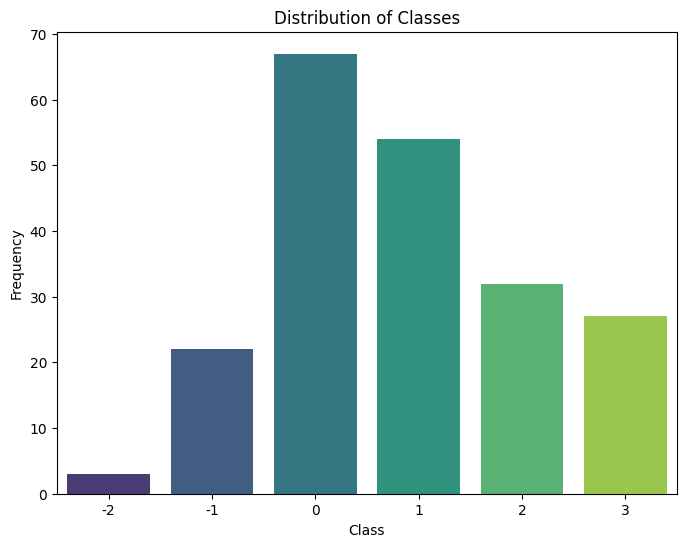

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of the target classes
plt.figure(figsize=(8, 6))  # Set the figure size
sns.countplot(data=df_cleaned, x='Class', palette="viridis")  # Plot class distribution
plt.title("Distribution of Classes")  # Set the plot title
plt.xlabel("Class")  # Label the x-axis
plt.ylabel("Frequency")  # Label the y-axis
plt.show()  # Display the plot

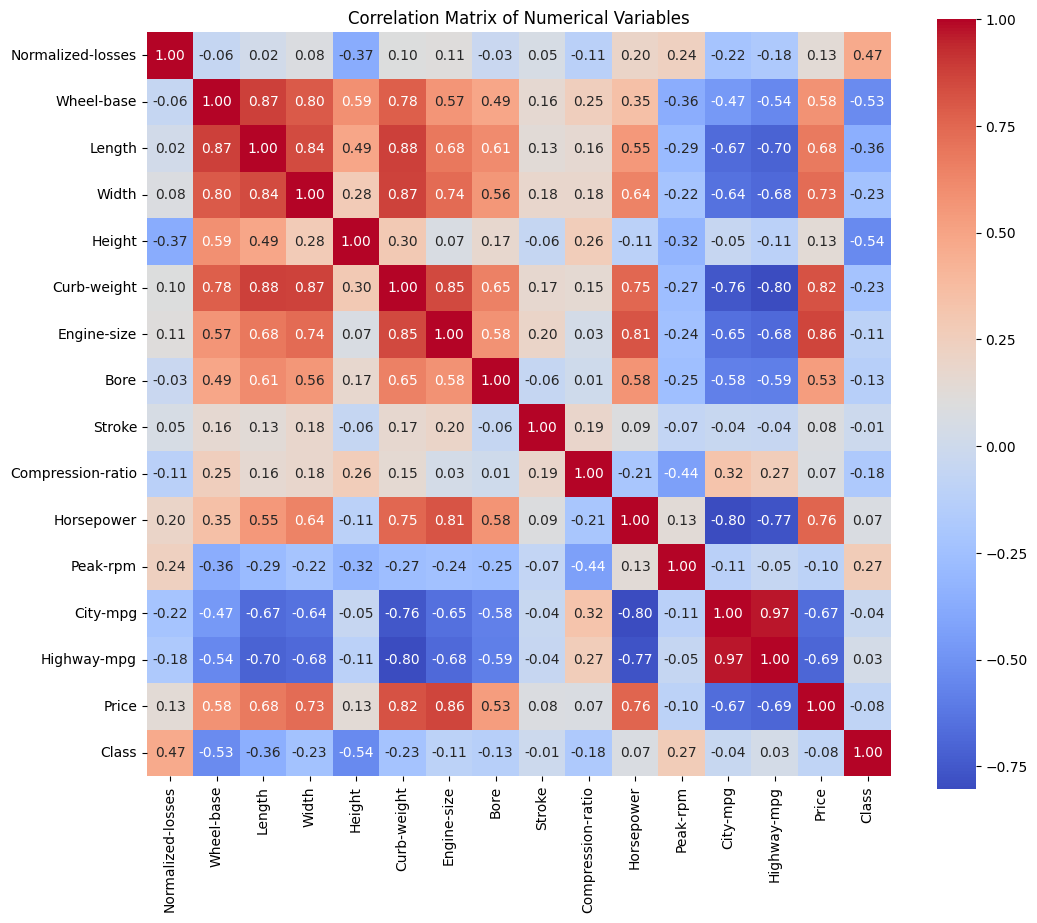

In [14]:
# Compute the correlation matrix for numerical variables
correlation_matrix = df_cleaned.corr(numeric_only=True)

# Heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))  # Set the figure size
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Numerical Variables")  # Set the plot title
plt.show()  # Display the heatmap

# Data Preprocessing

In [23]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [24]:
# Step 1: Separate features (X) and target (y)
X = df_cleaned.drop(columns=["Class"])  # Features
y = df_cleaned["Class"]  # Target variable

# Step 2: One-hot encode categorical variables
categorical_columns = X.select_dtypes(include=["object"]).columns  # Identify categorical columns
encoder = OneHotEncoder(sparse_output=False, handle_unknown="ignore")  # Use the updated argument
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_columns]))  # Encode categorical columns

# Add column names to the encoded DataFrame
X_encoded.columns = encoder.get_feature_names_out(categorical_columns)

# Step 3: Combine encoded columns with numerical columns
numerical_columns = X.select_dtypes(exclude=["object"]).columns  # Identify numerical columns
X_final = pd.concat([X[numerical_columns].reset_index(drop=True), X_encoded.reset_index(drop=True)], axis=1)

# Step 4: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

# Display shapes of the datasets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


Training features shape: (164, 75)
Testing features shape: (41, 75)
Training target shape: (164,)
Testing target shape: (41,)


# Step 3: Train Machine Learning Models

In [25]:
# Import machine learning models and metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Step 1: Initialize the models
decision_tree = DecisionTreeClassifier(random_state=42)
svm = SVC(random_state=42)
mlp = MLPClassifier(random_state=42, max_iter=500)

# Step 2: Train the models
decision_tree.fit(X_train, y_train)
svm.fit(X_train, y_train)
mlp.fit(X_train, y_train)

# Step 3: Evaluate the models
models = {"Decision Tree": decision_tree, "SVM": svm, "Neural Network": mlp}
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")
    y_pred = model.predict(X_test)  # Predict on test data

    # Calculate and display metrics
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))

    # Display confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



Evaluating Decision Tree...
Accuracy: 0.80
Classification Report:
              precision    recall  f1-score   support

          -1       0.80      0.57      0.67         7
           0       0.69      0.90      0.78        10
           1       0.86      0.92      0.89        13
           2       0.80      0.80      0.80         5
           3       1.00      0.67      0.80         6

    accuracy                           0.80        41
   macro avg       0.83      0.77      0.79        41
weighted avg       0.82      0.80      0.80        41

Confusion Matrix:
[[ 4  1  2  0  0]
 [ 1  9  0  0  0]
 [ 0  1 12  0  0]
 [ 0  1  0  4  0]
 [ 0  1  0  1  4]]

Evaluating SVM...
Accuracy: 0.66
Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.57      0.73         7
           0       0.53      1.00      0.69        10
           1       0.75      0.69      0.72        13
           2       0.33      0.20      0.25         5
       

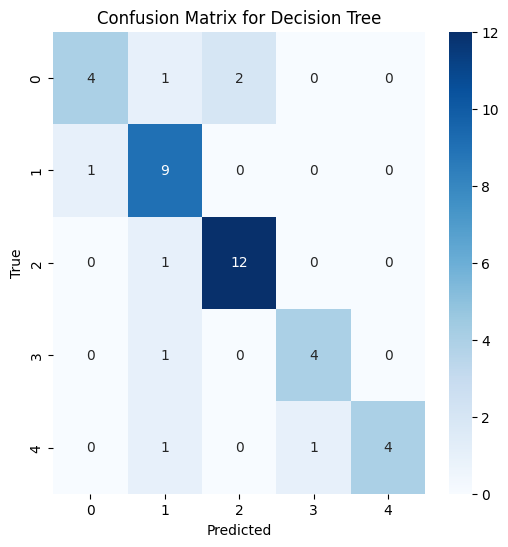

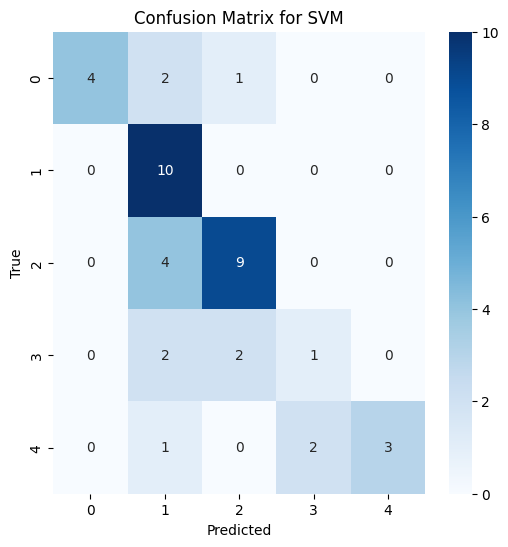

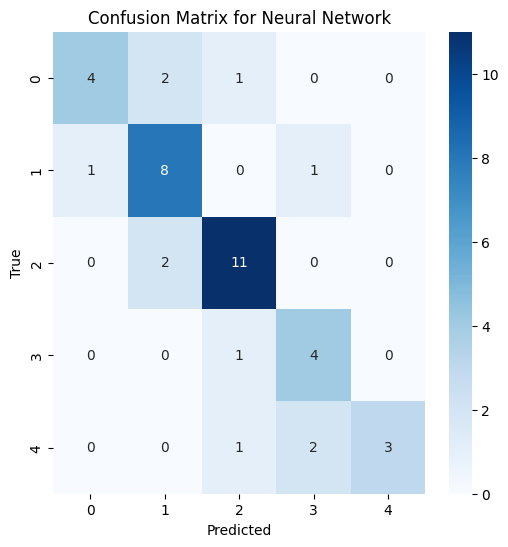

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

for model_name, model in models.items():
    y_pred = model.predict(X_test)
    plt.figure(figsize=(6, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix for {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

# Hyperparameter Tuning

In [27]:
from sklearn.model_selection import GridSearchCV

# Step 1: Define the hyperparameter grid
param_grid = {
    "criterion": ["gini", "entropy"],  # Split criteria
    "max_depth": [3, 5, 10, None],    # Maximum depth of the tree
    "min_samples_split": [2, 5, 10],  # Minimum samples to split a node
    "min_samples_leaf": [1, 2, 4]     # Minimum samples per leaf
}

# Step 2: Initialize the GridSearchCV object
grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    scoring="accuracy",  # Use accuracy as the evaluation metric
    cv=5,  # 5-fold cross-validation
    verbose=1,  # Display progress
    n_jobs=-1  # Use all available CPU cores
)

# Step 3: Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Step 4: Display the best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Accuracy:", grid_search.best_score_)

# Step 5: Evaluate the best model on the test set
best_model = grid_search.best_estimator_  # Retrieve the best model
y_pred_best = best_model.predict(X_test)

print("\nEvaluation of the Best Model on Test Set:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_best))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))


Fitting 5 folds for each of 72 candidates, totalling 360 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:776: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


Best Parameters: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Cross-Validation Accuracy: 0.7865530303030303

Evaluation of the Best Model on Test Set:
Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

          -2       0.00      0.00      0.00         0
          -1       0.71      0.71      0.71         7
           0       0.75      0.90      0.82        10
           1       0.67      0.77      0.71        13
           2       1.00      0.60      0.75         5
           3       1.00      0.50      0.67         6

    accuracy                           0.73        41
   macro avg       0.69      0.58      0.61        41
weighted avg       0.78      0.73      0.74        41

Confusion Matrix:
[[ 0  0  0  0  0  0]
 [ 1  5  0  1  0  0]
 [ 0  1  9  0  0  0]
 [ 0  1  2 10  0  0]
 [ 0  0  1  1  3  0]
 [ 0  0  0  3  0  3]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Comparison and Analysis.

In [28]:
# Initialize a dictionary to store results
results = {}

# Evaluate each model
for model_name, model in models.items():
    print(f"\nEvaluating {model_name}...")
    y_pred = model.predict(X_test)  # Predictions on test set

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)

    # Store metrics
    results[model_name] = {
        "Accuracy": accuracy,
        "Precision": report["weighted avg"]["precision"],
        "Recall": report["weighted avg"]["recall"],
        "F1-Score": report["weighted avg"]["f1-score"]
    }

# Add the optimized model to the results
y_pred_optimized = best_model.predict(X_test)
optimized_accuracy = accuracy_score(y_test, y_pred_optimized)
optimized_report = classification_report(y_test, y_pred_optimized, output_dict=True)

results["Optimized Model"] = {
    "Accuracy": optimized_accuracy,
    "Precision": optimized_report["weighted avg"]["precision"],
    "Recall": optimized_report["weighted avg"]["recall"],
    "F1-Score": optimized_report["weighted avg"]["f1-score"]
}

# Convert results to a DataFrame
results_df = pd.DataFrame(results).transpose()

# Display the results
print("\nModel Comparison:")
print(results_df)



Evaluating Decision Tree...

Evaluating SVM...

Evaluating Neural Network...

Model Comparison:
                 Accuracy  Precision    Recall  F1-Score
Decision Tree    0.804878   0.821120  0.804878  0.801178
SVM              0.658537   0.723898  0.658537  0.648719
Neural Network   0.731707   0.764344  0.731707  0.728422
Optimized Model  0.731707   0.784553  0.731707  0.737013


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


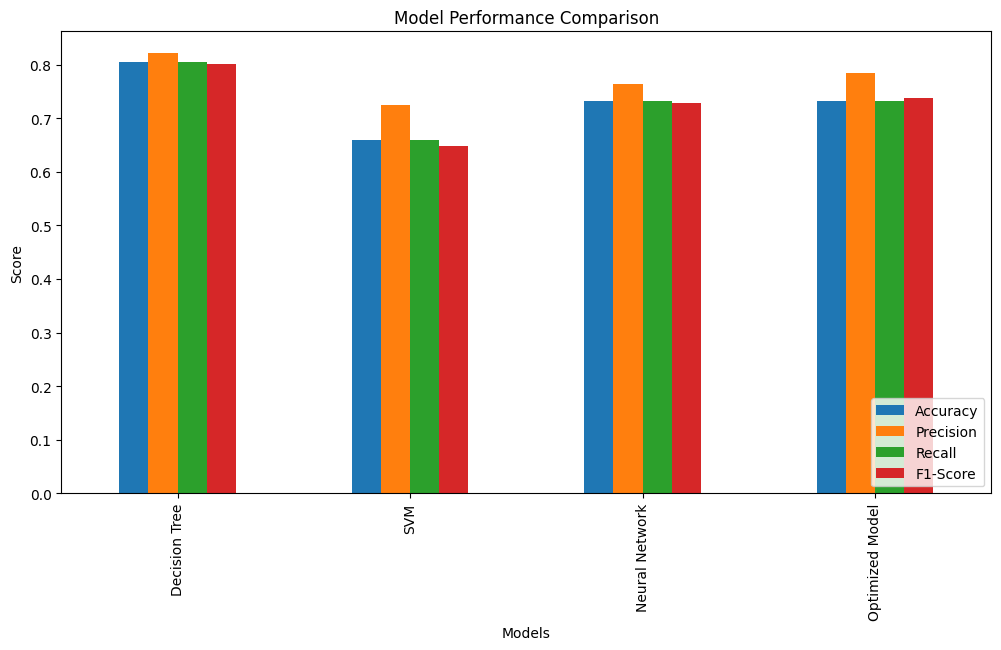

In [29]:
# Bar chart for comparison
results_df.plot(kind="bar", figsize=(12, 6))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xlabel("Models")
plt.legend(loc="lower right")
plt.show()